In [3]:
#============================================================================
# import packages
import cv2
import numpy as np
import imutils
import matplotlib.pylab as plt
%matplotlib inline

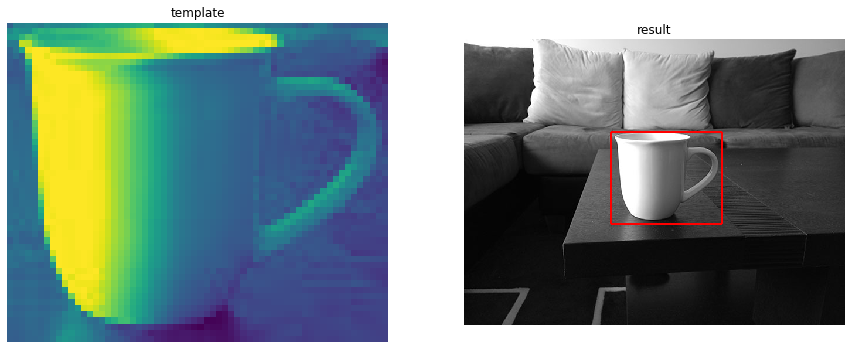

In [20]:
#============================================================================
# load data
src = cv2.imread('./data/input image.jpg', cv2.IMREAD_GRAYSCALE)
tmp = cv2.imread('./data/template.jpg', cv2.IMREAD_GRAYSCALE)
dst  = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)  # 출력 표시 영상

# TODO: 구현
#============================================================================

#연결된 컴포넌트 개수 및 라벨링 수행
_, dst = cv2.threshold(dst, 254, 255, cv2.THRESH_BINARY)

cnts, _ = cv2.findContours(cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# init for loop

maxWidht = maxHeight = size = -1

for item in cnts:
    x, y, w, h = cv2.boundingRect(item)
    if(size < (w*h)):
        maxWidth = w
        maxHeight = h
        size = w * h
    

maxWidth += 60
maxHeight += 90

resizedTemplate = cv2.resize(tmp, dsize=(maxWidth, maxHeight))
R1 = cv2.matchTemplate(src, resizedTemplate, cv2.TM_SQDIFF_NORMED)
minVal , maxVal , minLoc, maxLoc = cv2.minMaxLoc(R1)
w, h = resizedTemplate.shape[:2]

src = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)
cv2.rectangle(src, minLoc, (minLoc[0]+h, minLoc[1]+w), (255,0,0), 2)
dst = src

cv2.waitKey()
cv2.destroyAllWindows()
#============================================================================
# display
rows = 1
cols = 2
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(tmp)
ax1.set_title('template')
ax1.axis("off")

ax2 = fig.add_subplot(rows, cols, 2)
ax2.imshow(dst)
ax2.set_title('result')
ax2.axis("off")

plt.show()